In [41]:
import pandas as pd
from scipy.stats import skew, kurtosis

In [42]:
df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [44]:
numerical_vars = ['Balance', 'CreditScore', 'EstimatedSalary']

# Calculate summary statistics for each variable
for var in numerical_vars:
    mean = df[var].mean()
    median = df[var].median()
    std_dev = df[var].std()
    skewness = skew(df[var])
    kurtosis_val = kurtosis(df[var])

    print(f"Summary statistics for {var}:")
    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Standard Deviation: {std_dev}")
    print(f"  Skewness: {skewness}")
    print(f"  Kurtosis: {kurtosis_val}")
    print("\n")

Summary statistics for Balance:
  Mean: 76485.889288
  Median: 97198.54000000001
  Standard Deviation: 62397.40520238623
  Skewness: -0.14108754375291138
  Kurtosis: -1.489267106315331


Summary statistics for CreditScore:
  Mean: 650.5288
  Median: 652.0
  Standard Deviation: 96.65329873613061
  Skewness: -0.07159586676212397
  Kurtosis: -0.42611279176518124


Summary statistics for EstimatedSalary:
  Mean: 100090.239881
  Median: 100193.915
  Standard Deviation: 57510.49281769822
  Skewness: 0.0020850448448748848
  Kurtosis: -1.181527710874237




In [45]:
gender_distribution = df['Gender'].value_counts(normalize=True) * 100
print("Distribution by Gender:")
print(gender_distribution)

Distribution by Gender:
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


In [46]:
geography_distribution = df['Geography'].value_counts(normalize=True) * 100
print("\nDistribution by Geography:")
print(geography_distribution)


Distribution by Geography:
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


In [47]:
age_distribution = df['Age'].value_counts(bins=10, normalize=True) * 100 # Or use 'AgeGroup' if created
print("\nDistribution by Age:")
print(age_distribution)


Distribution by Age:
(32.8, 40.2]                  36.29
(25.4, 32.8]                  21.79
(40.2, 47.6]                  18.71
(47.6, 55.0]                   9.10
(17.924999999999997, 25.4]     6.11
(55.0, 62.4]                   4.41
(62.4, 69.8]                   2.08
(69.8, 77.2]                   1.27
(77.2, 84.6]                   0.20
(84.6, 92.0]                   0.04
Name: proportion, dtype: float64


In [48]:
salary_stats = df.groupby('IsActiveMember')['EstimatedSalary'].agg(['min', 'max', 'mean'])
print(salary_stats)

                  min        max           mean
IsActiveMember                                 
0               91.75  199992.48  100767.203854
1               11.58  199953.33   99452.965894


Correlation Matrix:
                 CreditScore   Balance  EstimatedSalary
CreditScore         1.000000  0.006268        -0.001384
Balance             0.006268  1.000000         0.012797
EstimatedSalary    -0.001384  0.012797         1.000000


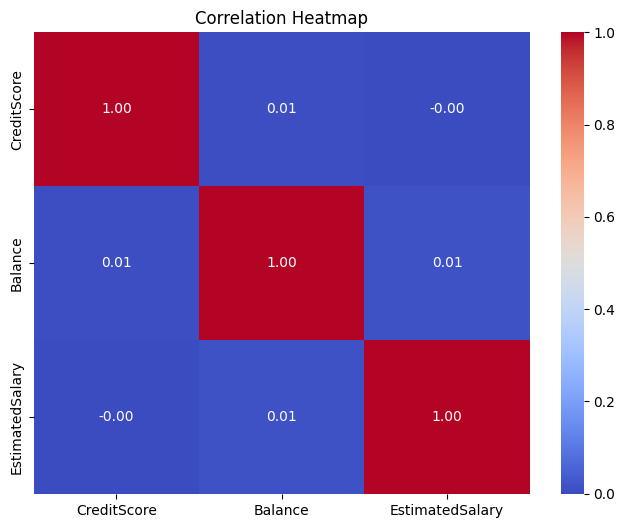

In [49]:
correlation_matrix = df[['CreditScore', 'Balance', 'EstimatedSalary']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [50]:
# Group data by 'Exited' status
grouped_data = df.groupby('Exited')

average_balance = grouped_data['Balance'].mean()
print("Average Balance:")
print(average_balance)

Average Balance:
Exited
0    72742.750663
1    91109.476006
Name: Balance, dtype: float64


             Balance                          EstimatedSalary              \
                mean     median           std            mean      median   
Exited                                                                      
0       72742.750663   92063.06  62851.577108    99726.853141   99620.355   
1       91109.476006  109344.23  58346.483197   101509.908783  102489.335   

                      
                 std  
Exited                
0       57399.956717  
1       57932.623392  


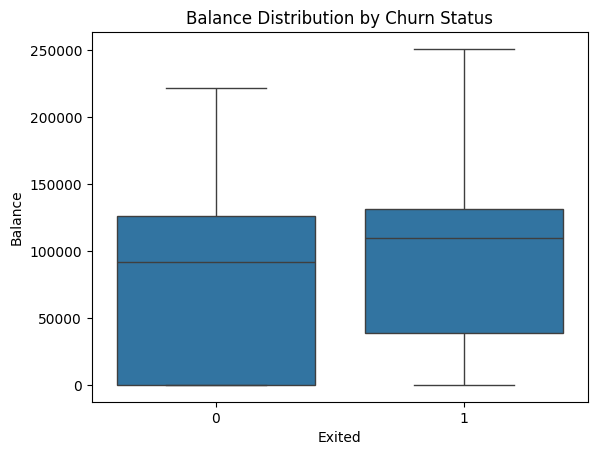

In [51]:
churn_stats = df.groupby('Exited')[['Balance', 'EstimatedSalary']].agg(['mean', 'median', 'std'])
print(churn_stats)

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.show()

In [52]:
low_credit_score_threshold = 600
high_balance_threshold = 10000

filtered_df = df[(df['CreditScore'] < low_credit_score_threshold) & (df['Balance'] > high_balance_threshold)]
probability = len(filtered_df) / len(df)
print(f"Probability of low credit score and high balance: {probability}")

Probability of low credit score and high balance: 0.191
